In [1]:
# importing libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [89]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((1168, 81), (292, 80))

In [90]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
424,568,20,RL,70.0,10171,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,168.0,Gd,TA,PConc,Gd,TA,No,GLQ,2,Unf,0,1515,1517,GasA,Ex,Y,SBrkr,1535,0,0,1535,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,532,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,214000
17,728,20,RL,64.0,7314,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,82.0,Gd,TA,PConc,Gd,TA,Av,GLQ,724,Unf,0,508,1232,GasA,Ex,Y,SBrkr,1232,0,0,1232,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2007.0,RFn,2,632,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,194500
1125,483,70,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1915,2005,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,TA,PConc,TA,TA,No,ALQ,299,Unf,0,611,910,GasA,Ex,Y,SBrkr,916,910,0,1826,1,0,1,1,4,1,Ex,7,Min2,1,Gd,Attchd,1915.0,Unf,1,164,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,155000
1032,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,304.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1350,Unf,0,626,1976,GasA,Ex,Y,SBrkr,1976,0,0,1976,1,0,2,0,2,1,Gd,7,Typ,1,Ex,Attchd,2006.0,RFn,3,908,TA,TA,Y,250,63,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
728,508,20,FV,75.0,7862,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,27,Unf,0,1191,1218,GasA,Ex,Y,SBrkr,1218,0,0,1218,0,0,2,0,2,1,Gd,4,Typ,0,NaN,Attchd,2009.0,Fin,2,676,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,9,2009,New,Partial,208300


#### In the Data Analysis Phase we will Analyze the following in step by step:
1. Missing Values
2. All the Numerical variables
3. Distribution of the numerical variables
4. Categorical Variables
5. Cardinality of the categorical variables
6. Outliers
7. Relationship between Dependentn and Independent features

### Missing values

In [91]:
features_with_na = [features for features in train_df.columns if train_df[features].isnull().sum()>1]
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [92]:
print("Features with missing values:")
for feature in features_with_na:
    print(feature, np.round(train_df[feature].isnull().mean(), 4))

Features with missing values:
LotFrontage 0.1832
Alley 0.9341
MasVnrType 0.006
MasVnrArea 0.006
BsmtQual 0.0257
BsmtCond 0.0257
BsmtExposure 0.0265
BsmtFinType1 0.0257
BsmtFinType2 0.0265
FireplaceQu 0.4717
GarageType 0.0548
GarageYrBlt 0.0548
GarageFinish 0.0548
GarageQual 0.0548
GarageCond 0.0548
PoolQC 0.994
Fence 0.7971
MiscFeature 0.9623


#### Finding relationship between missing values and sale price

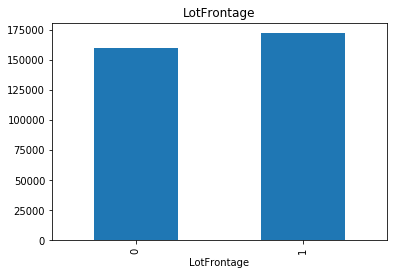

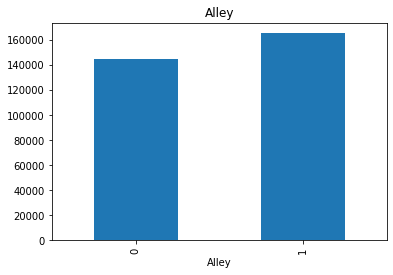

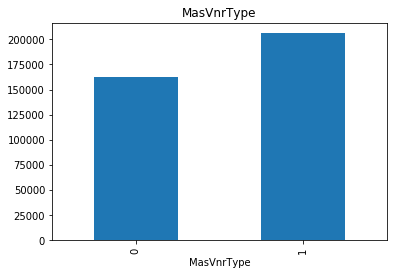

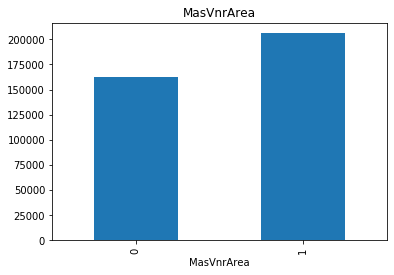

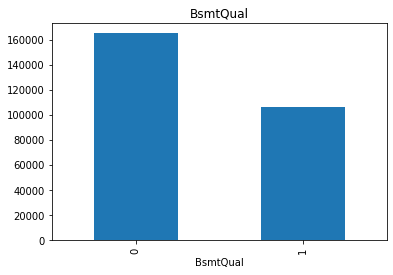

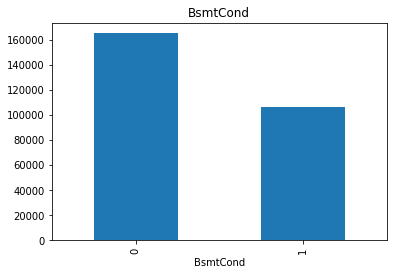

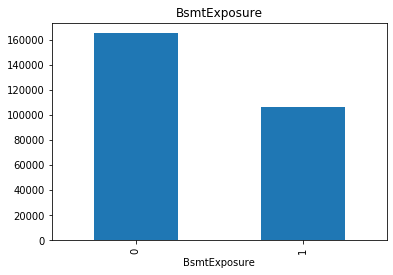

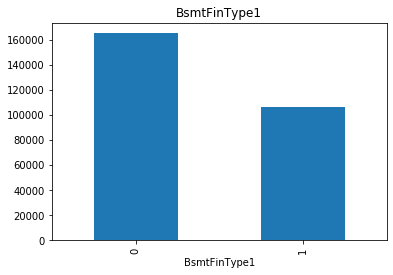

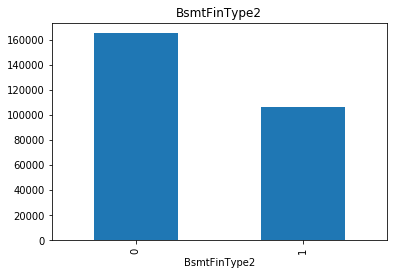

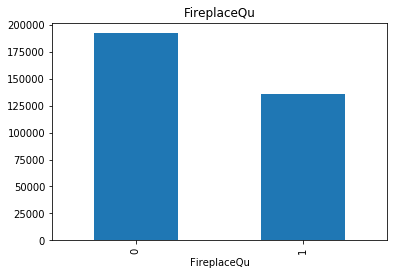

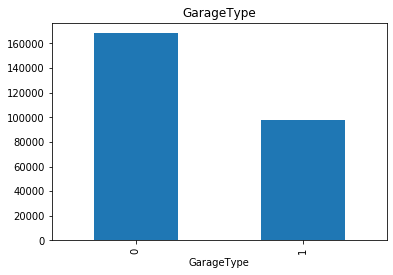

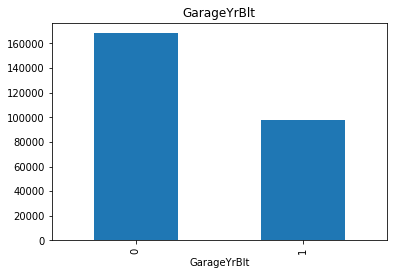

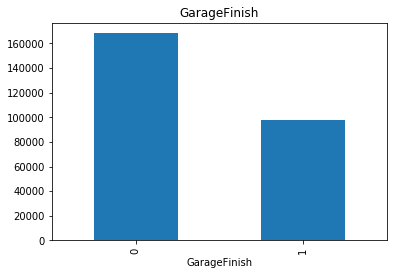

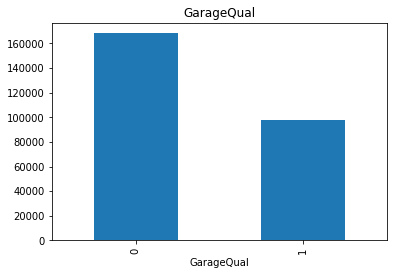

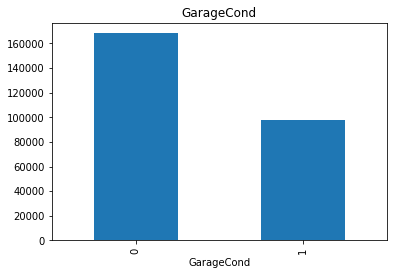

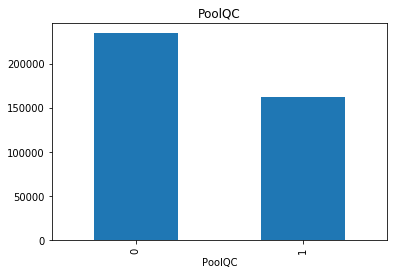

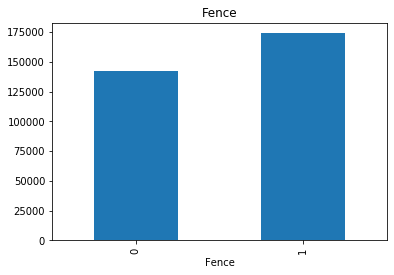

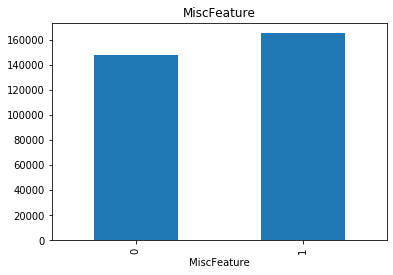

In [93]:
for x in features_with_na:
    df = train_df.copy()
    
    # converting missing values to 1 and others to 0
    df[x] = np.where(df[x].isnull(), 1, 0)
    
    df.groupby(x)['SalePrice'].median().plot.bar() #barplot because we have both numerical & categorical variable
    plt.title(x)
    plt.show()

Here, we can see that the missing values are impacting the SalePrice to a great extend.

1. In case of some feature, with high number of missing values, the median SalePrice is also high.
2. In other cases, with less number of missing values, less is the median SalePrice

In the dataset, some features like ID is not required for our prediction

In [94]:
# Counts of IDs
print("ID of Houses {}".format(len(train_df.Id)))

ID of Houses 1168


### Numerical variables

In [95]:
num_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']

print("No. of numerical features: ", len(num_features))
train_df[num_features].head()

No. of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


### Temporal variables

In the dataset, we have 4 Year variables. We need to extract information from these features such as No. of years or No. of days. One example in this specific scenario can be the difference in years between the house was build and the year it was sold. This will be considerd in the feature engineering part.

In [96]:
year_features = [col for col in num_features if 'Yr' in col or 'Year' in col]

print('Temporal Variables: ', year_features)

Temporal Variables:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [97]:
train_df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009


In [98]:
for i in year_features:
    print('\n', i, train_df[i].unique())


 YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]

 YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]

 GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 198

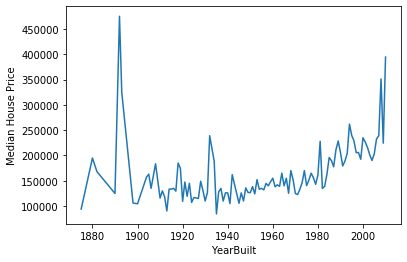

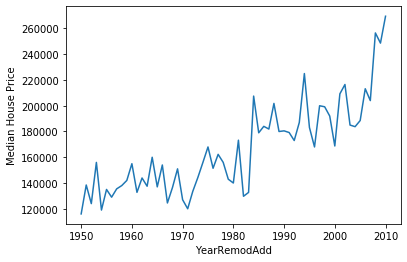

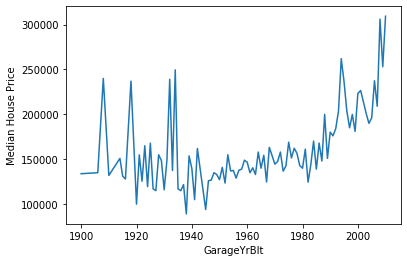

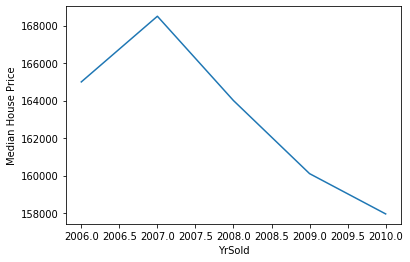

In [99]:
for feature in year_features:
    train_df.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.show()
    

We can see that the Sale Price is decreasing as the advancement in time which is not quite acceptable as we know that in real life, the opposite only happens.

So, we will try to compare thr difference between all year feature with the SalePrice

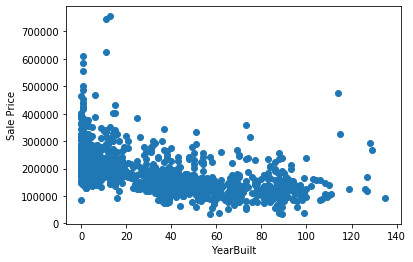

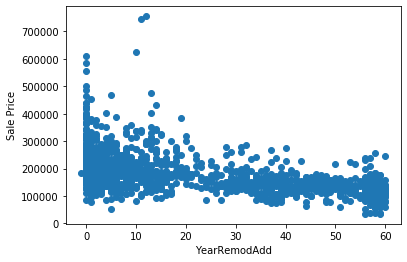

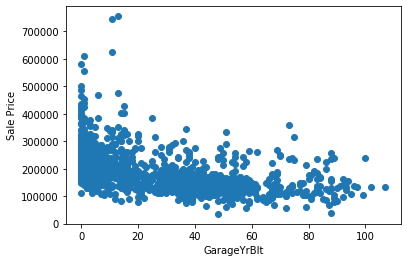

In [100]:
for x in year_features:
    if x != 'YrSold':
        df = train_df.copy()
        df[x] = df['YrSold'] - df[x]
        plt.scatter(df[x], df['SalePrice'])
        plt.xlabel(x)
        plt.ylabel("Sale Price")
        plt.show()

#### Now it makes sense...
1. The SalePrice for recently built house is high while SalePrice for house build 140 years ago is low.
2. The SalePrice of house that are remodified recently is high and low for houses that were modified very long ago.
3. Simarly it is true for the feature GarageYrBlt

### Discrete variables


In [101]:
# we are considering a feature to be dicrete if it has less than 25 unique values
# and are not part of Year Features and Id

discrete_cols = [col for col in num_features if len(train_df[col].unique())<25
              and col not in year_features + ['Id']]
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [102]:
train_df[discrete_cols].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


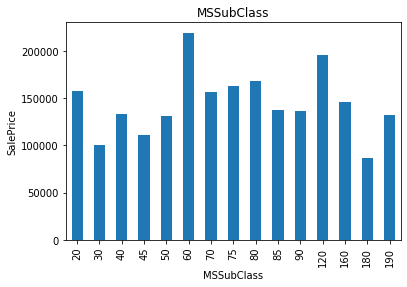

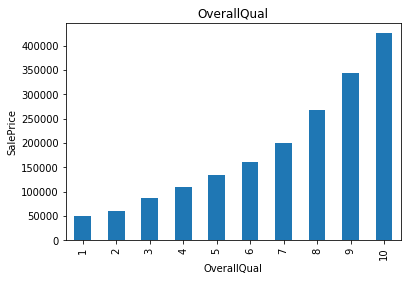

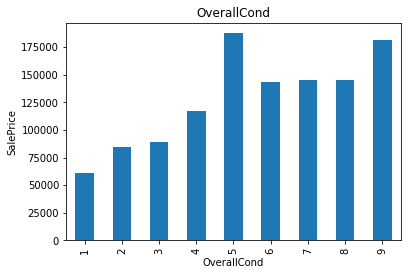

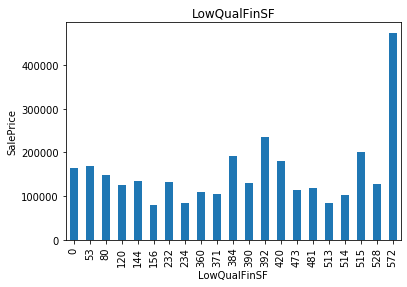

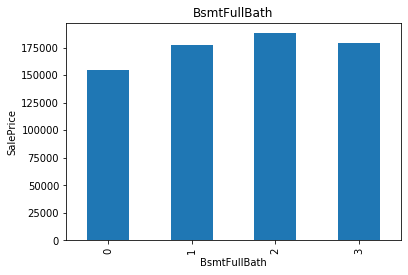

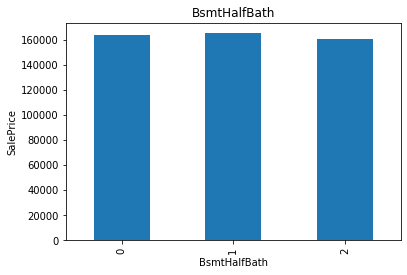

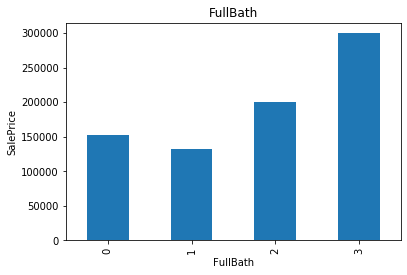

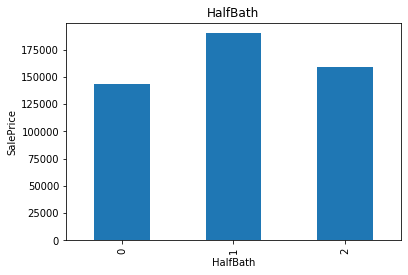

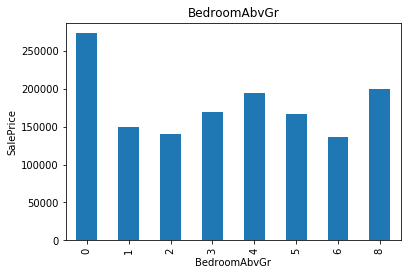

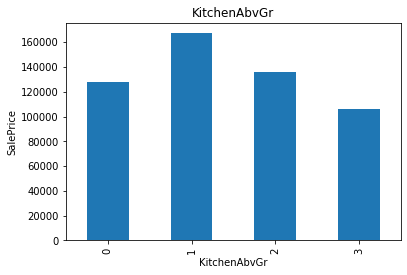

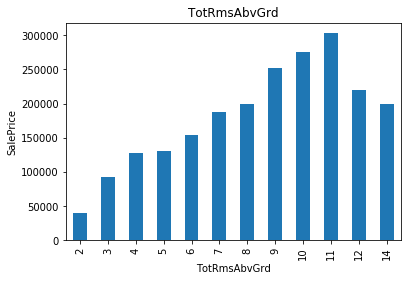

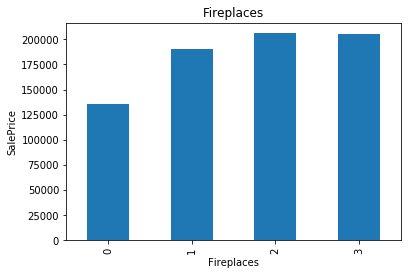

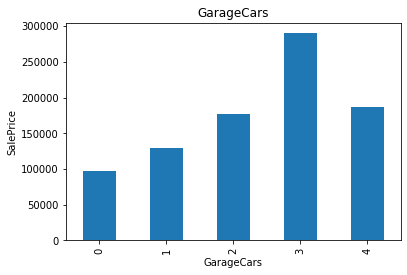

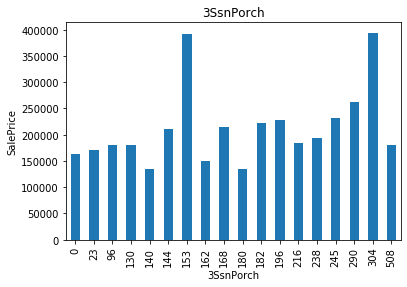

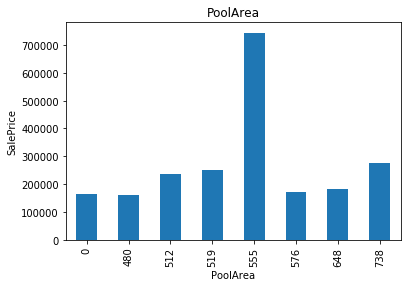

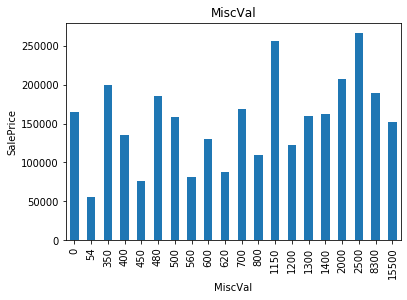

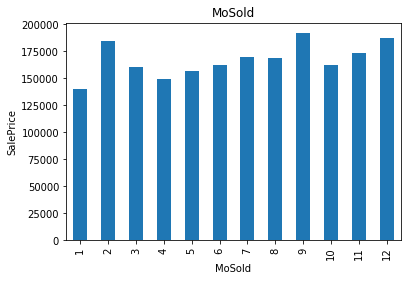

In [103]:
# Finding the relationship between discrete and dependent variables

for feature in discrete_cols:
    data = train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

Observations:

* With the increase in overall quality, the SalePrice is exponentially increasing (a monotonic relationship).
* There are some relationship between discrete and dependent variable

#### Continuous variables

In [104]:
contin_feature=[feature for feature in num_features if feature not in discrete_cols+ year_features+['Id']]
print("No. of Continuous Features: {}".format(len(contin_feature)))

No. of Continuous Features: 16


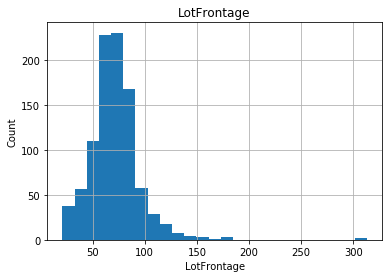

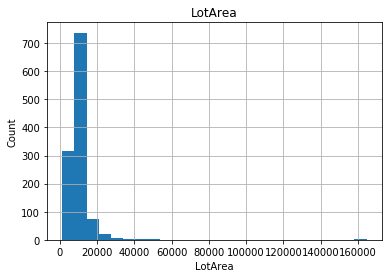

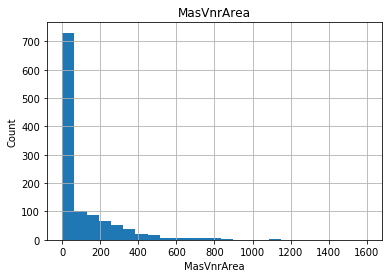

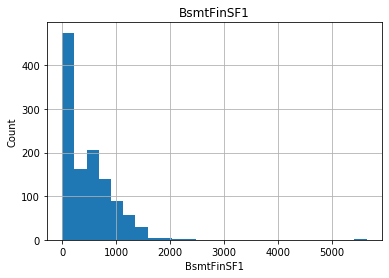

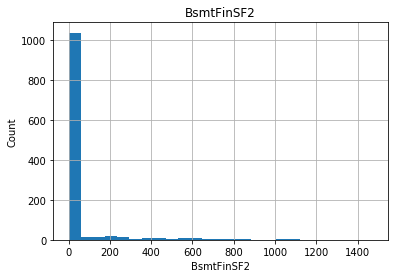

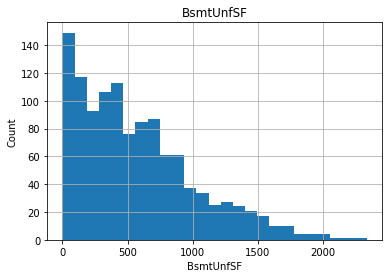

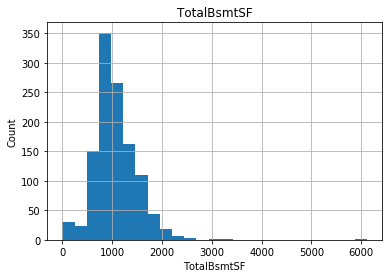

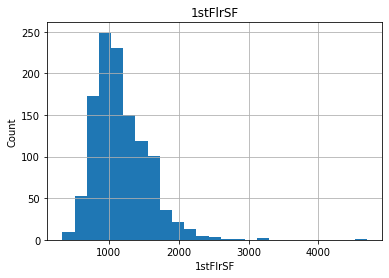

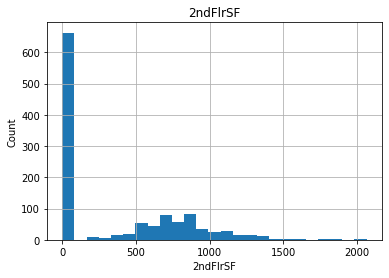

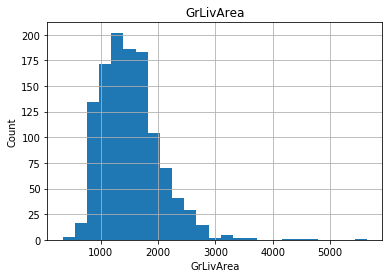

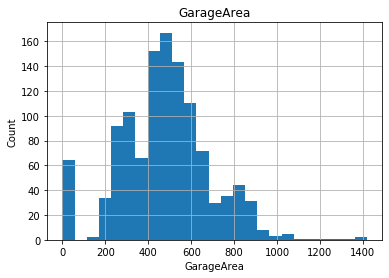

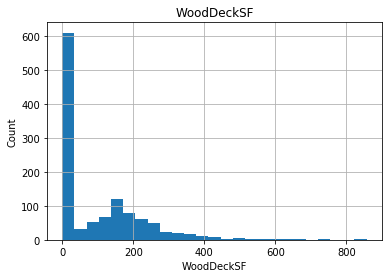

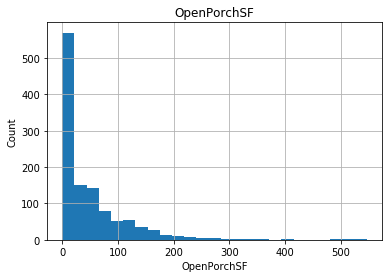

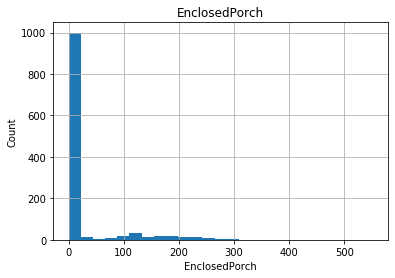

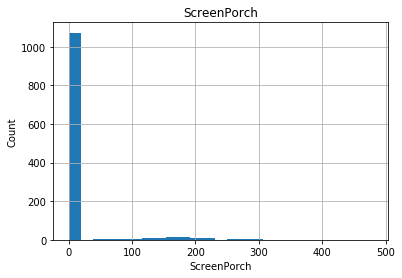

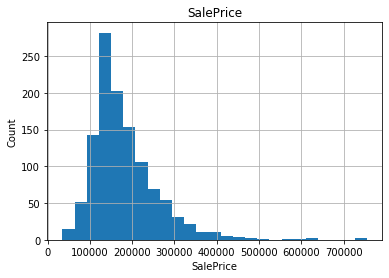

In [105]:
# Analyzing the Continuous variables

# Creating histograms because we are trying to find out the distribution of the continuous variables
for feature in contin_feature:
    data = train_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Most of the continuous distribution are not in normal (Gaussian) distribution form but skewed.

We need to keep in mind that, while dealing a regression problem with non-normal data, we need to convert them into normal (by log normal dist) for better working of the model.

#### Applying Log Normal Transformation

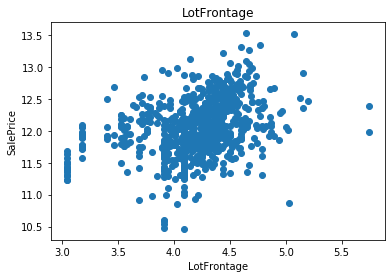

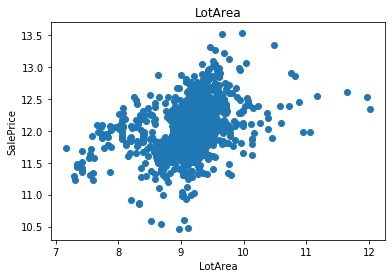

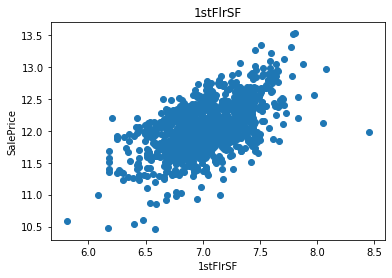

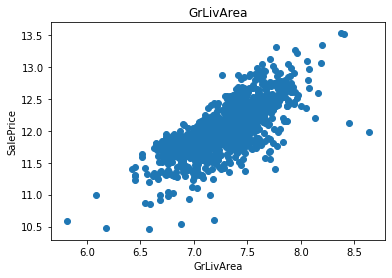

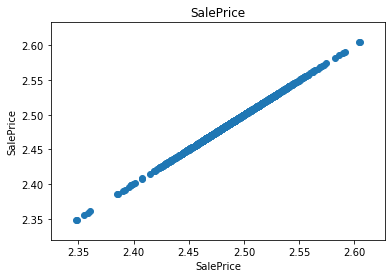

In [106]:
## WE will using Logarithmic Transformation to convert the skewed continous var to normal

for feature in contin_feature:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice']= np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

After applying the log normal transformation and plotting the distribution we can see that there's a **Monotonic Relation** between the continuous features and the dependent variables

#### Outliers

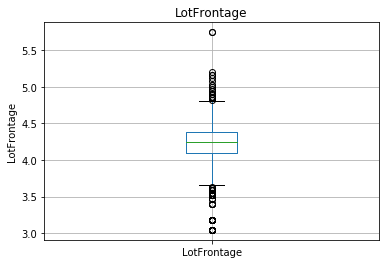

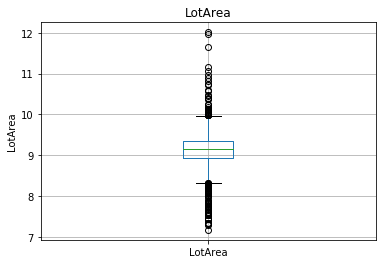

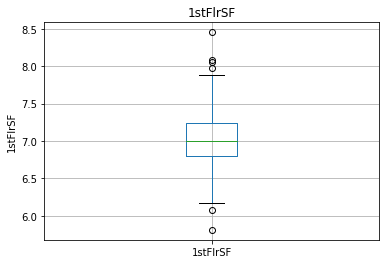

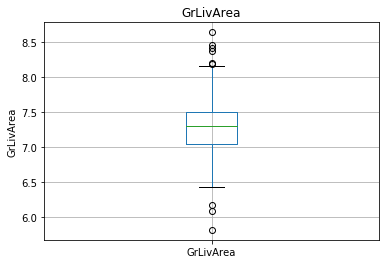

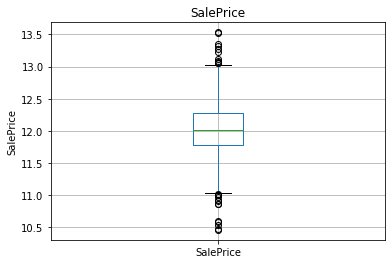

In [107]:
# Finding the outliers

for feature in contin_feature:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        #plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**There's a lot of outliers in our continuous variables. We need to take care of these**

#### Categorical Features

In [108]:
categorical_feature=[feature for feature in train_df.columns if train_df[feature].dtype=='O']

#len(categorical_feature)
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [109]:
train_df[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [110]:
# finding out how many categories each of the categoricl features are having
# that is called the Cardinality

for feature in categorical_feature:
    print('The feature {} has {} No. of categories'.format(feature, len(train_df[feature].unique())))

The feature MSZoning has 5 No. of categories
The feature Street has 2 No. of categories
The feature Alley has 3 No. of categories
The feature LotShape has 4 No. of categories
The feature LandContour has 4 No. of categories
The feature Utilities has 1 No. of categories
The feature LotConfig has 5 No. of categories
The feature LandSlope has 3 No. of categories
The feature Neighborhood has 25 No. of categories
The feature Condition1 has 9 No. of categories
The feature Condition2 has 8 No. of categories
The feature BldgType has 5 No. of categories
The feature HouseStyle has 8 No. of categories
The feature RoofStyle has 6 No. of categories
The feature RoofMatl has 8 No. of categories
The feature Exterior1st has 14 No. of categories
The feature Exterior2nd has 15 No. of categories
The feature MasVnrType has 5 No. of categories
The feature ExterQual has 4 No. of categories
The feature ExterCond has 5 No. of categories
The feature Foundation has 6 No. of categories
The feature BsmtQual has 5 N

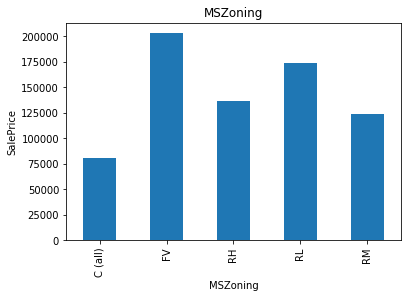

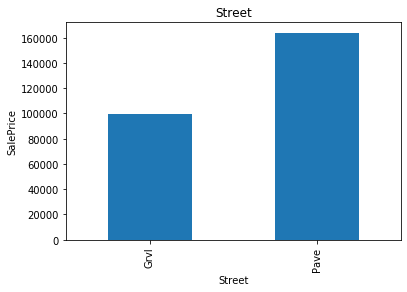

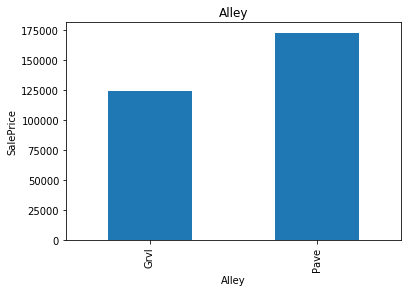

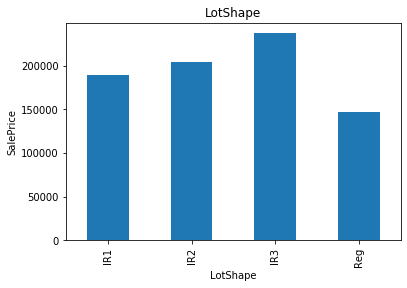

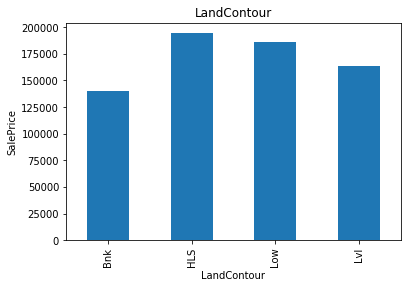

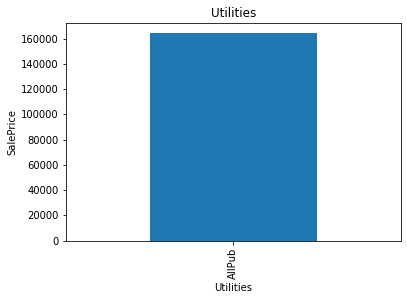

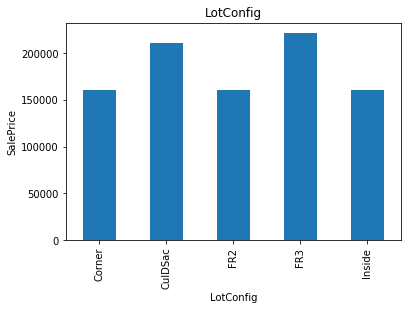

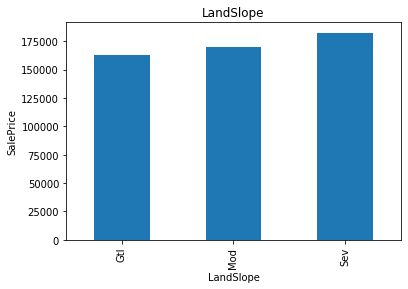

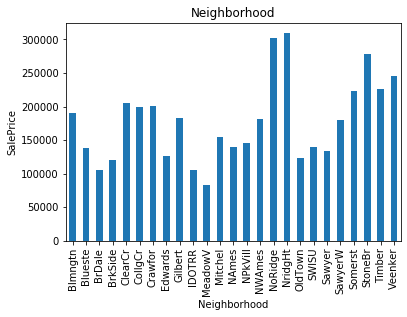

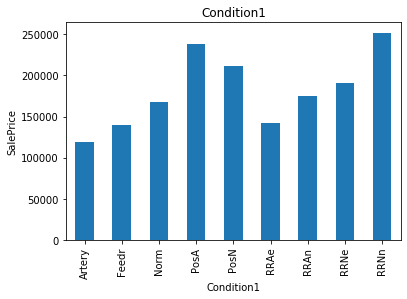

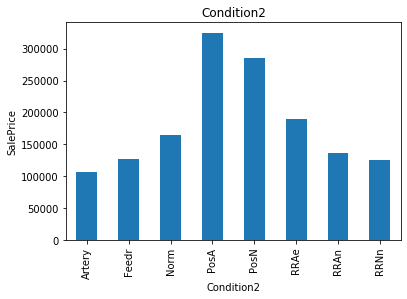

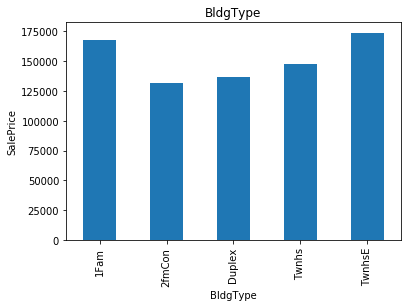

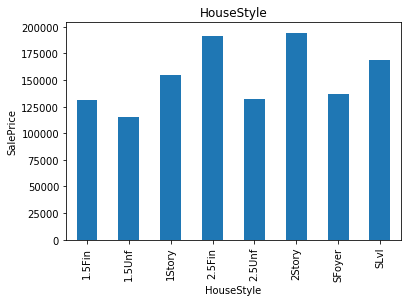

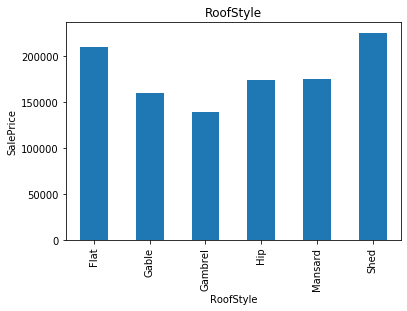

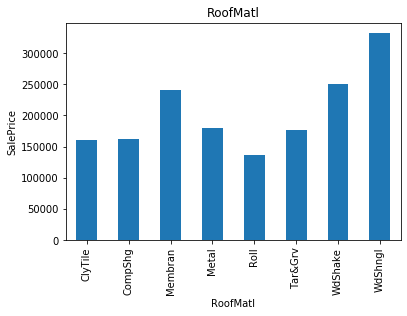

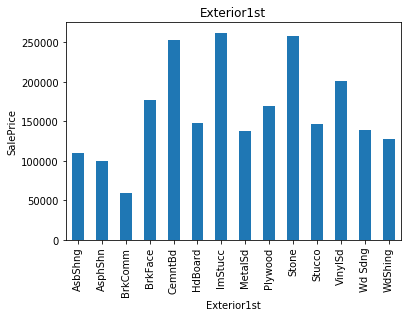

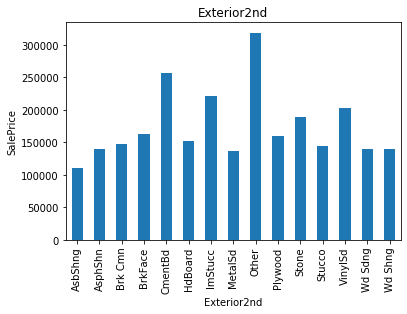

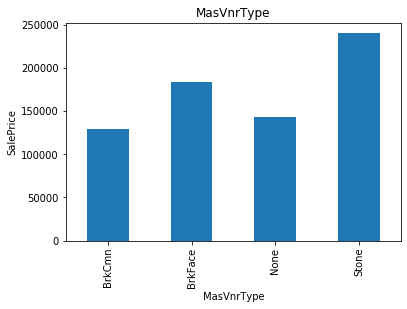

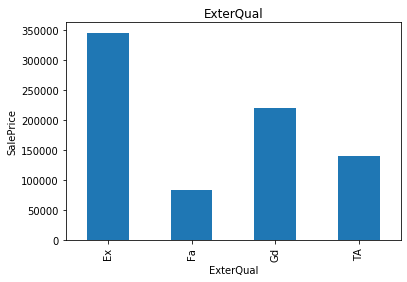

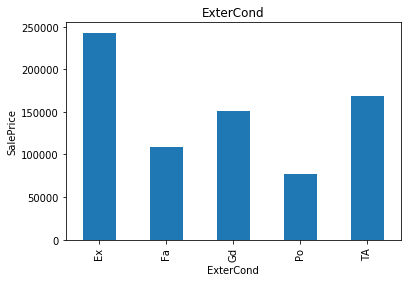

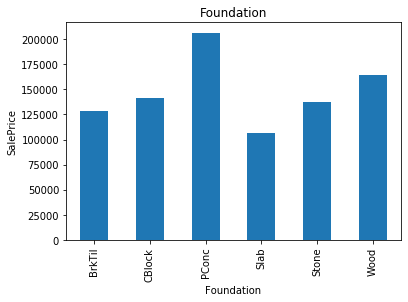

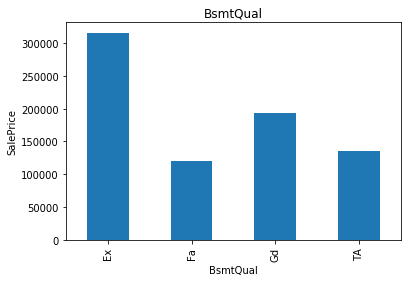

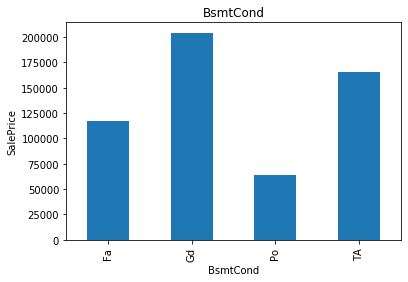

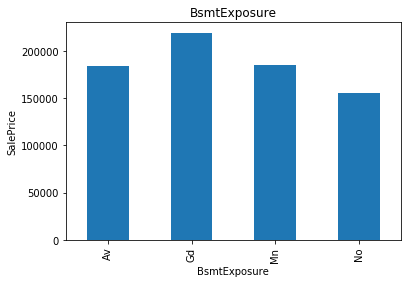

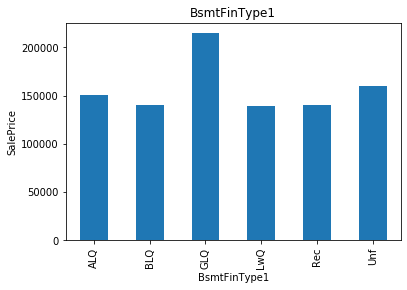

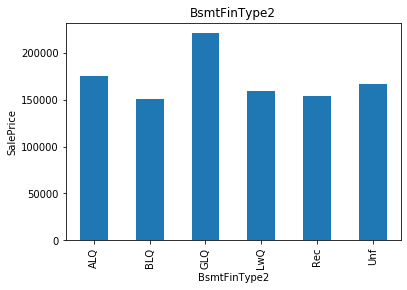

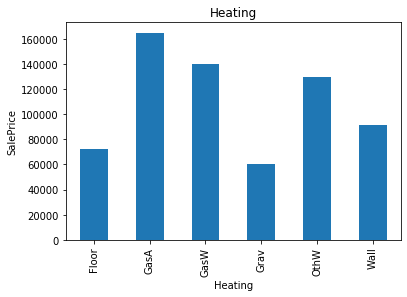

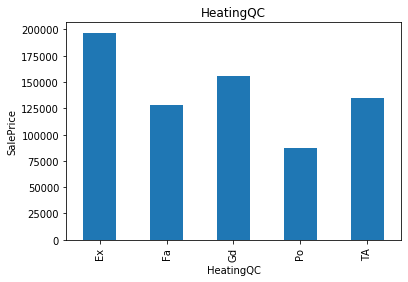

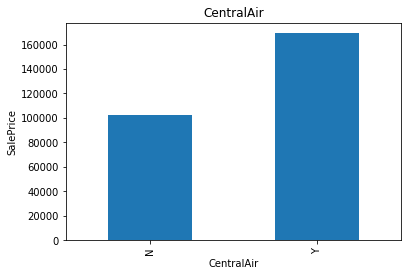

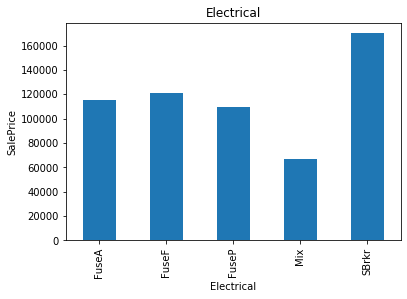

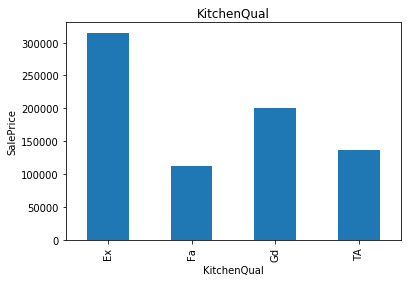

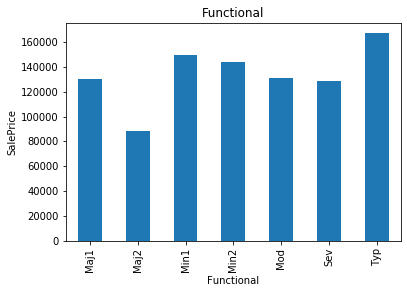

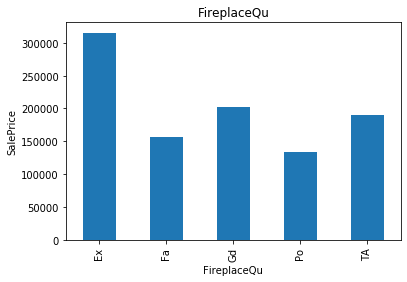

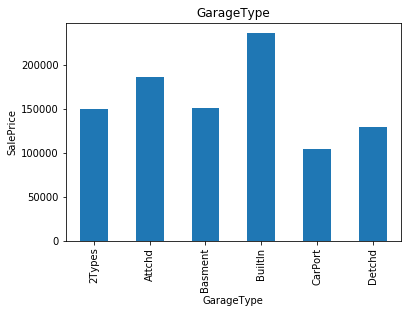

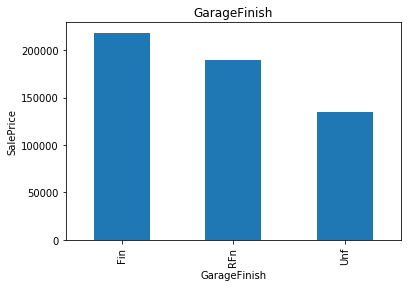

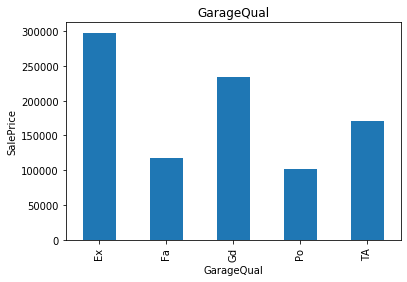

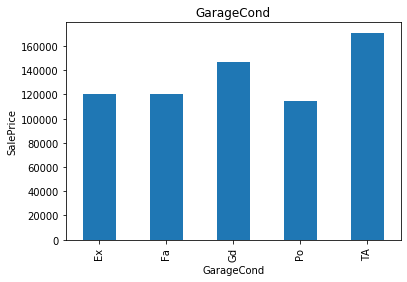

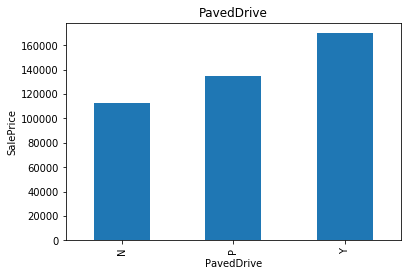

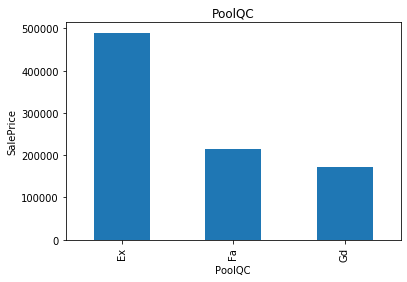

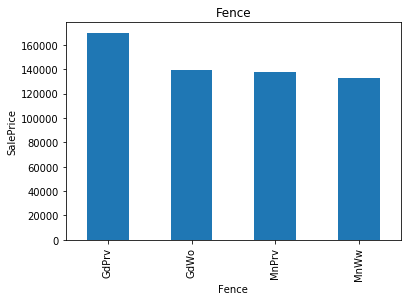

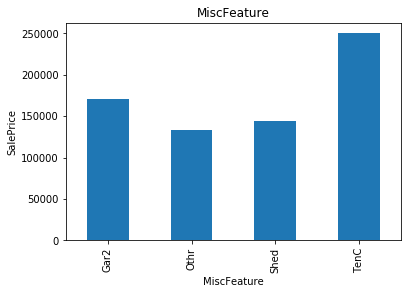

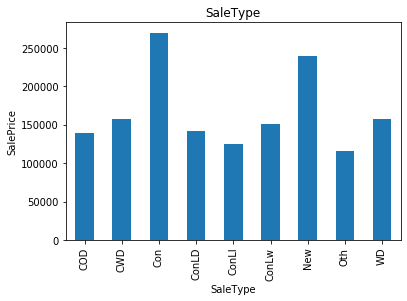

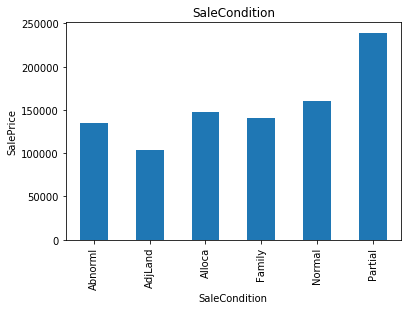

In [111]:
# Relationship between categorical features and dependent variable

for feature in categorical_feature:
    data = train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Feature Engineering

The main aim of this phase is to make our data suitable and add more importance to it for the modelling

We have to do the exact Feature Engineering for both the Train and the Test data, so we'll be combining the data and then will perform the feature engineering.

In [156]:
train_df.shape, test_df.shape

((1168, 81), (292, 80))

In [157]:
train_df.columns.symmetric_difference(test_df.columns)

Index(['SalePrice'], dtype='object')

In [158]:
X_train = train_df.drop(['SalePrice'], axis=1)
Y_train = train_df['SalePrice']

In [159]:
X_train.columns.symmetric_difference(test_df.columns)

Index([], dtype='object')

In [160]:
combined = pd.concat([X_train, test_df])
combined.shape

(1460, 80)

#### missing values

In [161]:
# Let us capture all the NAN values
# First let's handle the categorical features which are missing
feature_nan = [feature for feature in combined.columns if combined[feature].isnull().sum()>1 and combined[feature].dtypes=='O']

for feature in feature_nan:
    print("{}: {}% missing values".format(feature, np.round(combined[feature].isnull().mean(), 4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [162]:
# replacing the missing values of the above categorical feature with a new feature
# replacing NAN values by a label 'Missing'
def replace_cat_feature(dataset, feature_nan):
    data = combined.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data

combined = replace_cat_feature(combined, feature_nan)
combined[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### Handling the Numerical features which are missing

In [163]:
# let's handle the Numerical features which are missing

numerical_with_nan = [feature for feature in combined.columns if combined[feature].isnull().sum()>1 and combined[feature].dtypes != 'O']

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature, np.round(combined[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [164]:
# Replacing the numerical missing values

for feature in numerical_with_nan:
    #we'll replace missng values by median(because we have some outliers)
    median_value = combined[feature].median()
    
    # create a new feature to capture the NAN values
    # we are replacing the nan values by 1 and others by 0 in the newly created feature
    combined[feature + 'nan'] = np.where(combined[feature].isnull(), 1, 0)
    # we are doing the above line only to get some more information about the feature 
    combined[feature].fillna(median_value, inplace=True)
    
combined[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [165]:
#### Temporal Variables (Date Time Variables)
# we are replacing the years with the difference in years from the Year of SOld

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    combined[feature] = combined['YrSold'] - combined[feature]

combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,69.0,4928,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,1,0,0
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Missing,Missing,Missing,0,10,2007,WD,Normal,0,0,0
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,0,0,0
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,0,0,0
4,422,20,RL,69.0,16635,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,1,0,0


In [166]:
combined[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


#### Numerical Variables
Since the numerical variables are skewed, we'll perform Log Normal Transformation

In [167]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,69.0,4928,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,1,0,0
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Missing,Missing,Missing,0,10,2007,WD,Normal,0,0,0
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,0,0,0
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,0,0,0
4,422,20,RL,69.0,16635,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,1,0,0


In [168]:
# from EDA we got the following Skewed features
numerical_features = ['LotFrontage','LotArea', '1stFlrSF', 'GrLivArea']

for feature in numerical_features:
    combined[feature] = np.log(combined[feature])
    
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,4.234107,8.502689,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Missing,Missing,Missing,0,2,2007,WD,Normal,1,0,0
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Missing,Missing,Missing,0,10,2007,WD,Normal,0,0,0
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Missing,Missing,Missing,0,6,2007,WD,Normal,0,0,0
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,0,0,0
4,422,20,RL,4.234107,9.719264,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Missing,Missing,Missing,0,6,2009,WD,Normal,1,0,0


Now, we can see that our numerical_features columns got their Natural logarithmic values, which reduced their skewness.

In [169]:
### Dummies

# creating the dummy variables for the categorical variables
combined = pd.get_dummies(combined, drop_first=True)
combined.shape

(1460, 264)

In [170]:
## scaling

from sklearn.preprocessing import MinMaxScaler # it scales between 0 and 1
scaler = MinMaxScaler()
combined = pd.DataFrame(scaler.fit_transform(combined), columns=combined.columns)

In [171]:
combined.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleTy

In [183]:
#Distinguishing the train and test sets
del combined['Id']

X_train = combined[:1168]
X_test = combined[1168:]

X_train.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_

# Modelling

In [184]:
X_train.shape, X_test.shape, Y_train.shape

((1168, 263), (292, 263), (1168,))

In [229]:
X_test_id = test_df['Id']
X_test_id.tail()

287      83
288    1048
289      17
290     523
291    1379
Name: Id, dtype: int64

In [175]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

### Linear Models

In [193]:
X_test.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_

In [198]:
# Training the models

lasso_model = Lasso(alpha=0.0009, max_iter=50000).fit(X_train, Y_train)

#elastic_net_model = ElasticNet(alpha=0.0019, max_iter=50000).fit(X_train, Y_train)

#ridge_model = Ridge(alpha=41, max_iter=50000).fit(X_train, Y_train)

In [224]:
lasso_predictions = lasso_model.predict(X_test)

ridge_predictions = ridge_model.predict(X_test)

elastic_net_predictions = elastic_net_model.predict(X_test)

In [225]:
lasso_predictions

array([372362.96700542, 225528.91018804, 240861.11297727, 178222.06901914,
       229062.22522149,  72459.95110618, 119088.09701641, 350197.53296118,
       244970.26211602, 161095.84617994,  62047.2418942 , 131792.41794352,
       116427.95493515, 209502.07599091, 290509.8692974 , 123876.85933718,
       108050.12037478, 105273.83596835, 134668.45929776, 216506.2748704 ,
       146693.6229899 , 143381.27150853, 135950.28877771,  71766.77705609,
        88375.51833219, 116511.03063219, 175902.78242956, 123230.07360457,
       164021.81291419,  77035.00427477, 112609.24868102, 198159.77334333,
       210819.25380532, 183327.8178618 , 108822.74287337, 164889.25548482,
       187060.16594567, 126714.80062095, 147575.73768051, 154280.85151357,
        41981.31842258, 322264.78813152, 208031.50926939, 201167.58366955,
       141287.68734038, 138599.82624871, 134163.11943896,  66193.64188456,
       208149.99047331, 329665.84219768, 149139.92961615, 250506.21779787,
        87755.29168394,  

In [226]:
lasso_predictions= pd.DataFrame(lasso_predictions, index=X_test_id)
lasso_predictions.columns = ['Lasso_price']

ridge_predictions= pd.DataFrame(ridge_predictions, index=X_test_id)
ridge_predictions.columns = ['Ridge_price']

elastic_net_predictions= pd.DataFrame(elastic_net_predictions, index=X_test_id)
elastic_net_predictions.columns = ['Elastic_price']

In [228]:
pred = lasso_predictions.merge(ridge_predictions, left_index=True, right_index=True, how='inner')
pred = pred.merge(elastic_net_predictions, left_index=True, right_index=True, how='inner')
pred/head()

,Lasso_price,Ridge_price,Elastic_price
Id,,,
337,372362.967005,334788.381659,369041.782916
1018,225528.910188,206758.392528,235633.476244
929,240861.112977,236552.426350,247428.133026
1148,178222.069019,175742.842385,171984.630597
1227,229062.225221,251895.792255,233304.625013
650,72459.951106,66763.543813,72152.234305
1453,119088.097016,134613.401364,118597.851984
152,350197.532961,334540.065630,342602.500124
427,244970.262116,231802.156915,232188.944688


In [230]:
pred['SalePrice'] = (pred.Lasso_price + pred.Ridge_price + pred.Elastic_price)/3
pred.head()

,Lasso_price,Ridge_price,Elastic_price,SalePrice
Id,,,,
337,372362.967005,334788.381659,369041.782916,358731.043860
1018,225528.910188,206758.392528,235633.476244,222640.259653
929,240861.112977,236552.426350,247428.133026,241613.890784
1148,178222.069019,175742.842385,171984.630597,175316.514000
1227,229062.225221,251895.792255,233304.625013,238087.547496


In [233]:
pred1 = pred.drop(['Lasso_price','Ridge_price', 'Elastic_price'], axis=1)
pred1.to_csv('Predicted_salePrice_based_on_linear_models.csv')

# Ensemble method

In [208]:
gradient_boost = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50).fit(X_train, Y_train)

In [209]:
grad_boost_predictions = gradient_boost.predict(X_test)

In [214]:
grad_boost_predictions = pd.DataFrame(grad_boost_predictions,index=X_test_id)
grad_boost_predictions.columns = ['SalePrice']

In [215]:
grad_boost_predictions.head()

,SalePrice
Id,
337,368211.918317
1018,223875.262711
929,245582.040891
1148,178198.523383
1227,204319.490807
650,84242.935014
1453,125785.781301
152,324066.685678
427,236699.411117


In [234]:
grad_boost_predictions.to_csv('predicted_saleprice_gridientboost.csv')